<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Dauphine_logo_2019_-_Bleu.png" style="width: 600px;"/> 
</center>  

<div align="center"><span style="font-family:Arial Black;font-size:33px;color:darkblue"> Master Economie Finance </span></div>

<div align="center"><span style="font-family:Arial Black;font-size:27px;color:darkblue">Application Lab – Portfolio Management</span></div>

<div align="center"><span style="font-family:Arial Black;font-size:20px;color:darkblue">Time series data modelling
</span></div>

# Linear regression with python

## Data import - use for the example

We use the Boston real estate price data.

The first 401 observations are used for the estimation of a linear regression and the following observations for the calculation of the forecasts and the measurement of the precision of these forecasts by various criteria.

We will estimate two regressions:
    
     * regression of 'MEDV' (denoted y) on 'RM' denoted (x)
     * regression of 'MEDV' on all the other variables noted X

In [1]:
!pip install pandas > /dev/null 2>&1
!pip install numpy > /dev/null 2>&1
!pip install matplotlib > /dev/null 2>&1
!pip install seaborn > /dev/null 2>&1
!pip install sklearn > /dev/null 2>&1
!pip install statsmodels > /dev/null 2>&1
!pip install scipy > /dev/null 2>&1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from scipy import stats

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
# Separate the data into two sub-samples
# sample 1: up to index 400
# sample 2: from index 401
y1 = data.loc[:400,'MEDV'] #data.iloc[:401,-1]
y2 = data.loc[401:,'MEDV'] #data.iloc[401:,-1]
x1 = data.loc[:400,'RM']  
x2 = data.loc[401:,'RM'] 
X1 = data.loc[:400,data.columns!='MEDV'] 
X2 = data.loc[401:,data.columns!='MEDV'] 

## Simple linear regression with scikit-learn

Estimating a simple linear regression with **scikit-learn** involves 5 steps:
    
     1. import necessary packages and object classes
    
     2. Importing data and performing appropriate transformations
    
     3. Creation and Estimation of a Regression Model
    
     4. Checking the estimation results
    
     5. forecast with the estimated model
    
    
   
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [4]:
# First We transform the series **y** and **x** into numpy.array
x=np.array(x1)
y=np.array(y1)

x.shape, y.shape

# We must transform x into an array of dimension 2: one column and many rows
x=x[:,np.newaxis]
x.shape

(401, 1)

### Creating a model and estimating with existing data

In [5]:
model = LinearRegression()

In [6]:
model

LinearRegression()

In [7]:
model.fit(x,y) # equivalent to model = LinearRegression().fit(x,y)

LinearRegression()

### Displaying the results of a regression

#### Estimated coefficients

In [8]:
print(model.intercept_, model.coef_)#note the underscore

-35.45813178943158 [9.43054496]


#### $R^{2}$

In [9]:
r_sq =model.score(x,y)
print(f"determination coefficient: {r_sq}")

determination coefficient: 0.5642745121062778


### Forecast: calculation of adjusted variables

In [10]:
x_pred =np.array(x2)
x_pred =x_pred[:,np.newaxis]

y_pred = model.predict(x_pred) # alternative methods : y_pred = model.intercept_ + model.coef_*x_pred
print(f"predicted variable:\n{y_pred}")

predicted variable:
[24.35981486 24.9350781  14.98585318 16.70221236 18.13565519  3.56546323
 17.42836432 17.51323922 29.15996224 18.83351552 27.32100598  8.18643026
 13.15632745  7.15850086 25.21799445 28.4998241  14.56147865 20.71962451
 28.89590698 25.00109192 21.18172121 17.80558612 22.09648407 17.02285089
 20.14436127 19.58795911 23.03010802 22.94523312 24.70874502 24.40696759
 28.98078189 25.13311955 25.23685554 23.08669129 27.05695072 25.47261917
 22.55858077 20.51215252 17.60754467 19.40877876 24.95393919 23.19042729
 25.69895224 19.74827838 25.45375808 24.34095377 23.49220472 22.86978876
 25.05767519 28.18861611 27.30214489 23.92600979 34.26188706 27.99057467
 26.07617404 20.89880486 20.52158306 23.96373197 21.88901208 27.73594995
 24.67102284 24.11462069 25.9630075  23.09612184 18.85237661 20.67247178
 21.15342958 20.42727761 18.41857154 22.70003895 23.28473274 25.24628609
 30.367072   15.72143568 22.65288622 25.6895217  14.56147865 22.86978876
 23.28473274 23.40732982 28.198

### Calculation of forecast accuracy indicators

MSE:
- Measures the average squared difference between actual (y2) and predicted (y_pred) values.
- Penalizes larger errors more because of the squaring.
- Useful when large errors are particularly undesirable.

MAE: 
- Measures the average absolute difference (without squaring) between actual and predicted values.
- More robust to outliers than MSE.
- Useful when you want a direct, interpretable measure of average error in the same units as the data.

MAPE:
- Measures the average absolute percentage difference between actual and predicted values.
- Expressed as a percentage, making it scale-invariant and easier to interpret.

Rule of Thumb:
- Outliers present:	MAE
- Penalize large errors:	MSE
- Want scale-independent insights:	MAPE


In [11]:
print("Mean squared error: %.2f" %mean_squared_error(y2,y_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y2,y_pred))
print("Mean absolute percentage error: %.2f" %mean_absolute_percentage_error(y2,y_pred))

Mean squared error: 77.66
Mean absolute error: 7.27
Mean absolute percentage error: 0.61


# Multiple linear regression with scikit-learn

In [12]:
X = np.array(X1)
X.shape
model_all = LinearRegression().fit(X,y)

print(f"intercept {model_all.intercept_}")
print(f"coef: {model_all.coef_}")

r_sq = model_all.score(X,y)
print(f"score {r_sq}")

x_pred = np.array(X2)
y_all_pred = model_all.predict(x_pred)

print(f"prediction {y_all_pred}")

print("Mean squared error: %.2f" %mean_squared_error(y2,y_all_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y2,y_all_pred))
print("Mean absolute percentage error: %.2f" %mean_absolute_percentage_error(y2,y_all_pred))


intercept 29.00580915942632
coef: [-1.99873534e-01  4.42763141e-02  5.55407781e-02  1.73791950e+00
 -1.49715808e+01  4.85503348e+00  2.90568657e-03 -1.29621067e+00
  4.83051120e-01 -1.54201512e-02 -8.08704936e-01 -1.49681762e-03
 -5.23714094e-01]
score 0.7352124274349188
prediction [19.58764209 20.76354217 12.75957269  6.50814359  4.47071337  7.06776448
 21.74565968 15.95336962 24.20492324 16.95074641 22.71715509  5.00314396
 12.75920033 -3.93805933 15.11334105 19.96083573  9.38022995  6.18728639
 20.93395476 22.69635683 21.1505423  20.72383184 19.452712   20.05422324
 15.3052598  21.47638814 17.59772885 19.73056663 18.96613662 23.60388292
 24.55210924 27.07912512 23.06445028 20.9832873  19.042609   20.58685111
 14.69751333  9.97599707 14.70273344 13.44309661 19.88244938 21.39182263
 20.68780896 14.78663845 18.22094972 21.25012539 20.52500832 19.75392824
 20.85956883 23.87099178 22.96188233 21.45478615 26.34835019 22.31633319
 22.5760245  19.34334812 19.25826873 21.09442051 20.91811464

# Linear regressions with statsmodels

In [13]:
X1=sm.add_constant(X1) # statsmodels does not add a default constant in linear regressions. It needs to be added.
reg_all=sm.OLS(y1,X1).fit()
print(f"summary {reg_all.summary()}")
print(f"")

# Display of estimated coefficients
print(f"param {reg_all.params}")
print(f"")

# Display of the t-stat of the estimated coefficients
print(f" t-stat for estimated coefficient {reg_all.tvalues}")
print(f"")

# Display pvalue of the F-stat
print(f" pval of the F-sat {reg_all.f_pvalue}")
print(f"")

# If we want to check that the correlation is significantly different from 0 we can use the pearsonr function
print(f"check correlation is significantly different from 0: {stats.pearsonr(data['AGE'].to_numpy(), data['DIS'].to_numpy())}")
print(f"")
# Display R² and adjusted R²
print(f"R² and adjusted R² {reg_all.rsquared, reg_all.rsquared_adj}")
print(f"")

# Display of residuals
print(f" residuals {reg_all.resid}")
print(f"")

dir(reg_all) # list of all objects that can be retrieved from the results

summary                             OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     82.66
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          5.72e-103
Time:                        20:50:56   Log-Likelihood:                -1192.1
No. Observations:                 401   AIC:                             2412.
Df Residuals:                     387   BIC:                             2468.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0058      6.155      4.712 

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_get_wald_nonlinear',
 '_is_nested',
 '_transform_predict_exog',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 '

# Excercise

###  Stability of $ \beta_i $

We consider the following decomposition of the return of an asset $ i $:

$$
r_{it} = \alpha_i + \beta_i r_{mt} + e_{it}
$$

where $ r_{it} $ is the return on asset $ i $ and $ r_{mt} $ is the return on the stock market index. The term $ \beta_i r_{mt} $ measures the common variations to all assets, the residual $ e_{it} $ represents the specific risk of each asset.

The value of $ \beta_i $ determines the risk of asset $ i $ relative to the market portfolio:

- $ \beta_i = 1 $: asset $ i $ is as risky as the market portfolio.
- $ \beta_i < 1 $: asset $ i $ is less risky than the market portfolio.
- $ \beta_i > 1 $: asset $ i $ is more risky than the market portfolio.


---
1. **Import Excercise.csv**

- Import the data in a dataframe called data. 
- Set the columns Dates as index (this should become automatic when you handle a df which represents time series)
- Create a new df based on data which stored the return times series for each column
- Drop NaN value

2. **Select 10 securities at random.** For each of the $ n = 10 $ securities, estimate by the **OLS regression**: $ r_{it} = \alpha_i + \beta_i r_{mt} + e_{it} $ with $ t = 1, \dots, 40 $ first observations. The estimated model is noted

    $$
    r_{it} = \hat{\alpha}_i + \hat{\beta}_i r_{mt} + \hat{e}_{it}, \quad t = 1, \dots, 40
    $$

    We note $ \beta_{i,40} $ as the $ \beta $ of asset $ i $ obtained from the 40 first observations.

   The market return is given by the EUROSTOXX50 return

   Hint: for selecting random securities, check the numpy.random.choice() function.

4. **Estimate the same regression** for the equally weighted portfolio of $ n = 10 $ securities $ r_{pt} = \frac{1}{n} \sum_{i=1}^{n} r_{it} $

    $$
    r_{pt} = \alpha_p + \beta_p r_{mt} + e_{pt}, \quad t = 1, \dots, 40
    $$

    It can be shown that $ \alpha_p = \frac{1}{n} \sum_{i=1}^{n} \alpha_i $ and $ \beta_p = \frac{1}{n} \sum_{i=1}^{n} \beta_i $.


6. **Re-estimate the previous regressions for each security and the portfolio** by adding the following observations one by one to the first 40 observations. We will obtain for each asset a sequence of $ \beta_{i,40}, \beta_{i,41}, \dots, \beta_{i,T} $ where $ T $ is the end date of the sample. For each sequence of $ \beta_{i,40}, \beta_{i,41}, \dots, \beta_{i,T} $, calculate:

    - the mean,
    - the minimum, the maximum,
    - the standard deviation

Plot the beta time series for five different stocks, the portfolio and the EUROSTOXX50.

In [14]:
data = pd.read_csv('Exercise.csv',delimiter=r"\s+",encoding='latin_1')
data.head()

,Dates,ASML_Holding,LVMH,Lindle_PLC,TOTALENERGIES,SANOFI,SAP,L'OREAL,SIEMENS,ALLIANZ,...,ENI,Volkswagen,CRH,Nokia,Inditex,BMW,Adidas,Flutter,VONOVIA,EUROSTOXX50
0,03/01/2022,795.739990,838.309998,346.420013,50.720001,50.680000,140.320007,425.250000,152.899994,208.050003,...,28.059999,178.000000,53.040001,6.32,31.780001,88.910004,254.350006,11750.0,49.279999,4303.939941
1,04/01/2022,793.630005,838.570007,338.959991,51.060001,49.630001,141.110001,429.399994,154.279999,210.449997,...,28.530001,181.839996,54.049999,6.30,32.230000,91.889999,259.750000,11645.0,49.389999,4346.450195
2,05/01/2022,765.909973,848.500000,347.690002,52.209999,50.119999,141.639999,430.600006,154.919998,217.000000,...,28.809999,187.279999,54.119999,6.26,32.849998,94.500000,260.000000,11630.0,49.310001,4368.779785
3,06/01/2022,739.530029,831.099976,344.679993,52.410000,50.250000,137.259995,421.000000,154.919998,216.350006,...,28.879999,187.300003,53.430000,6.09,32.200001,94.699997,257.149994,11330.0,48.549999,4372.450195
4,07/01/2022,758.390015,822.890015,338.019989,52.549999,50.180000,137.070007,411.649994,153.759995,220.750000,...,28.900000,189.720001,52.869999,6.15,32.000000,96.000000,252.500000,11285.0,48.380001,4331.069824


In [15]:
data['Dates'] = pd.to_datetime(data['Dates'],format = '%d/%m/%Y')
data.set_index('Dates', inplace = True)

In [16]:
df_data_clean = data.dropna()
df_return = df_data_clean.pct_change().dropna()
df_return.head()

,ASML_Holding,LVMH,Lindle_PLC,TOTALENERGIES,SANOFI,SAP,L'OREAL,SIEMENS,ALLIANZ,SCHNEIDER,...,ENI,Volkswagen,CRH,Nokia,Inditex,BMW,Adidas,Flutter,VONOVIA,EUROSTOXX50
Dates,,,,,,,,,,,,,,,,,,,,,
2022-01-04,-0.002652,0.000310,-0.021535,0.006703,-0.020718,0.005630,0.009759,0.009026,0.011536,0.013431,...,0.016750,0.021573,0.019042,-0.003165,0.014160,0.033517,0.021231,-0.008936,0.002232,0.009877
2022-01-05,-0.034928,0.011842,0.025755,0.022522,0.009873,0.003756,0.002795,0.004148,0.031124,-0.003058,...,0.009814,0.029916,0.001295,-0.006349,0.019237,0.028404,0.000962,-0.001288,-0.001620,0.005137
2022-01-06,-0.034443,-0.020507,-0.008657,0.003831,0.002594,-0.030923,-0.022294,0.000000,-0.002995,-0.011249,...,0.002430,0.000107,-0.012749,-0.027157,-0.019787,0.002116,-0.010962,-0.025795,-0.015413,0.000840
2022-01-07,0.025503,-0.009878,-0.019322,0.002671,-0.001393,-0.001384,-0.022209,-0.007488,0.020337,-0.015743,...,0.000693,0.012920,-0.010481,0.009852,-0.006211,0.013728,-0.018083,-0.003972,-0.003502,-0.009464
2022-01-10,-0.055209,-0.027817,-0.013609,0.010276,0.000797,0.000292,-0.003037,-0.010146,0.010193,-0.015762,...,-0.001384,-0.003795,-0.005485,-0.011382,0.010937,0.025937,-0.025149,0.023482,-0.022530,-0.004373


In [17]:
np.random.seed(0)
columns = np.random.choice(df_return.columns[:-1], size=10, replace=False)
print(f"Random selected stocks are {columns}")

Random selected stocks are ['ENEL' 'AIR_LIQUIDE' 'Deutsche_Telekom' 'ENI' 'Lindle_PLC' 'SAFRAN'
 'Stellantis' 'ING' 'Mercedes' 'SANOFI']


In [18]:
window = 40
market_index = df_return.columns[-1] # EUROSTOXX50
results_first_alpha_beta_estimation = pd.DataFrame(index=columns, columns=['Alpha', 'Beta'])

for col in columns:
    y = df_return[col].iloc[:window]  
    x = df_return[market_index].iloc[:window]  
    x = sm.add_constant(x)  

    model = sm.OLS(y, x).fit()

    results_first_alpha_beta_estimation.loc[col, 'Alpha'] = model.params.iloc[0]
    results_first_alpha_beta_estimation.loc[col, 'Beta'] = model.params.iloc[1]

In [19]:
print("Alpha and Beta estimation for selected random stocks (based on the first 40 return for each stock)")
print(results_first_alpha_beta_estimation)

Alpha and Beta estimation for selected random stocks (based on the first 40 return for each stock)
                     Alpha      Beta
ENEL             -0.000313  0.812211
AIR_LIQUIDE       0.000354  0.745004
Deutsche_Telekom  0.000763  0.720929
ENI               0.003493 -0.003659
Lindle_PLC       -0.004242  0.215784
SAFRAN            0.003256  1.041186
Stellantis        -0.00179  0.457446
ING              -0.004607  0.579077
Mercedes          0.002263  0.689412
SANOFI            0.000042   0.01276


In [20]:
portfolio_returns = df_return[columns].iloc[:40].mean(axis=1)  
market_returns = df_return[market_index].iloc[:40]

x_portfolio = sm.add_constant(market_returns)
portfolio_model = sm.OLS(portfolio_returns, x_portfolio).fit()

alpha_p = portfolio_model.params.iloc[0]
beta_p = portfolio_model.params.iloc[1]

In [21]:
print("Alpha and Beta estimation for portfolio (based on the first 40 return for each stock)")
print(alpha_p, beta_p)

Alpha and Beta estimation for portfolio (based on the first 40 return for each stock)
-7.808533049642632e-05 0.527015066691439


In [22]:
# Extending time frame for beta estimation
portfolio_returns = df_return[columns].mean(axis=1)  
market_returns = df_return[market_index]

index_for_rolling_regression = df_return.index[window-1:] #rescale to have the first date where a full 40-day window is available
columns_for_rolling_regression = list(columns) + ['Portfolio', 'Market'] # to store betas for each stock, the portfolio, and the market

beta_df = pd.DataFrame(index=index_for_rolling_regression, columns=columns_for_rolling_regression, dtype=float)
alpha_df = pd.DataFrame(index=index_for_rolling_regression, columns=columns_for_rolling_regression, dtype=float)

for t in range(window - 1, len(df_return)):
    date = df_return.index[t]

    mkt_ret = market_returns.iloc[:t+1]
    X = sm.add_constant(mkt_ret)

    for col in columns:
        y = df_return[col].iloc[:t+1]
        model = sm.OLS(y, X).fit()
        alpha_df.loc[date, col] = model.params.iloc[0]
        beta_df.loc[date, col]  = model.params.iloc[1] 

    # Portfolio
    y_port = portfolio_returns.iloc[:t+1]
    model_port = sm.OLS(y_port, X).fit()
    alpha_df.loc[date, 'Portfolio'] = model_port.params.iloc[0]
    beta_df.loc[date, 'Portfolio']  = model_port.params.iloc[1]
    
    # Market
    y_mkt = market_returns.iloc[:t+1]
    model_mkt = sm.OLS(y_mkt, X).fit()
    alpha_df.loc[date, 'Market'] = model_mkt.params.iloc[0]
    beta_df.loc[date, 'Market']  = model_mkt.params.iloc[1] 

In [23]:
beta_df.describe()

,ENEL,AIR_LIQUIDE,Deutsche_Telekom,ENI,Lindle_PLC,SAFRAN,Stellantis,ING,Mercedes,SANOFI,Portfolio,Market
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,2.080000e+02
mean,0.608743,0.517749,0.507225,0.220618,0.239235,0.940705,0.203323,0.243174,0.702265,-0.035959,0.414708,1.000000e+00
std,0.172449,0.093276,0.093271,0.045941,0.043468,0.225203,0.084854,0.081687,0.180438,0.068161,0.075897,5.637333e-16
min,0.420160,0.374790,0.377914,-0.003659,0.125412,0.651078,0.059817,0.117189,0.454834,-0.157132,0.310536,1.000000e+00
25%,0.454663,0.437097,0.422772,0.197902,0.209487,0.746852,0.182358,0.213982,0.522347,-0.115000,0.341248,1.000000e+00
50%,0.524847,0.484855,0.473691,0.218638,0.232834,0.843187,0.194982,0.220075,0.642701,-0.008794,0.393257,1.000000e+00
75%,0.768657,0.602987,0.592999,0.239444,0.279577,1.179909,0.222830,0.244812,0.923606,0.011755,0.470997,1.000000e+00
max,1.176158,0.745004,0.778365,0.421108,0.391054,1.503139,0.855110,0.896918,1.012985,0.238759,0.711474,1.000000e+00


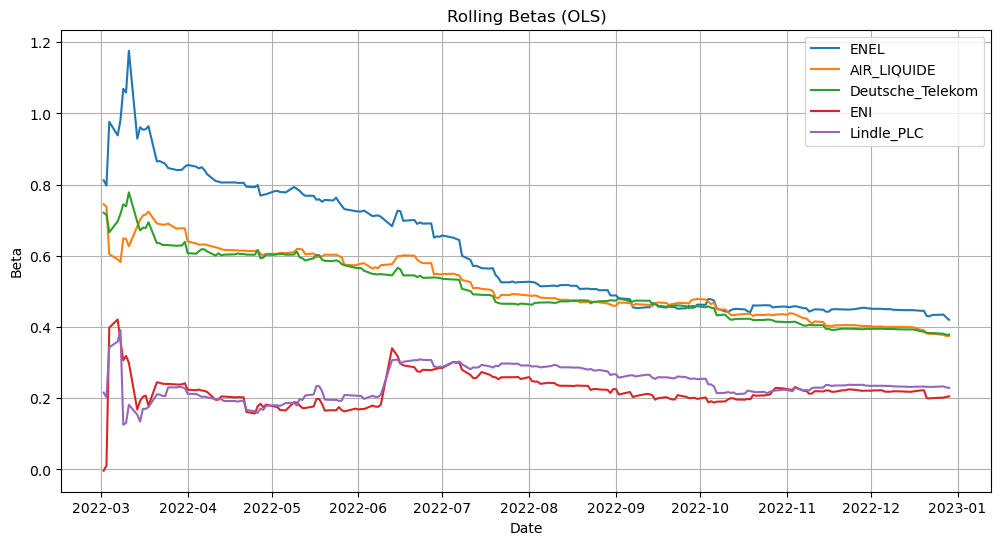

In [24]:
to_plot = columns[:5]  # first five random securities

plt.figure(figsize=(12,6))

for sec in to_plot:
    plt.plot(beta_df[sec], label=sec)

plt.title("Rolling Betas (OLS)")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.grid(True)
plt.show()

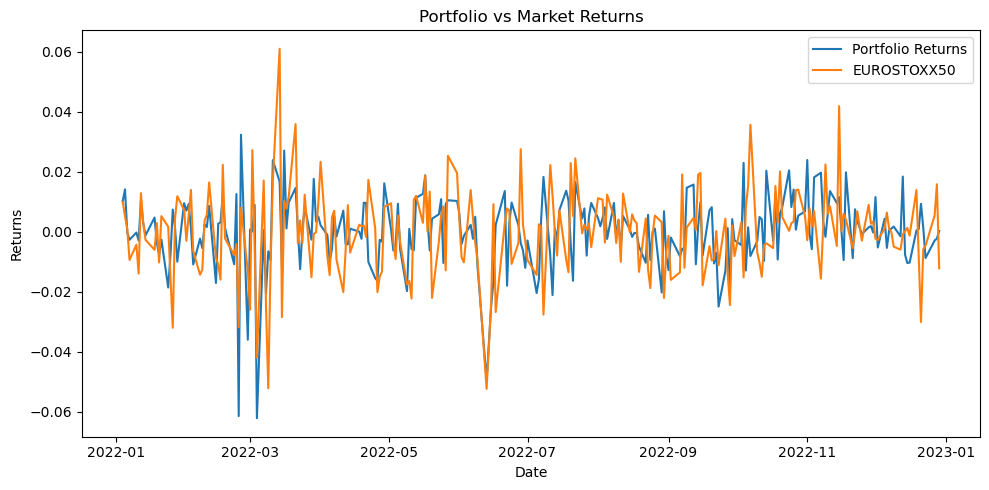

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(portfolio_returns.index, portfolio_returns, label="Portfolio Returns")
plt.plot(df_return.index, df_return[market_index], label="EUROSTOXX50")

plt.title("Portfolio vs Market Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.tight_layout()
plt.show()

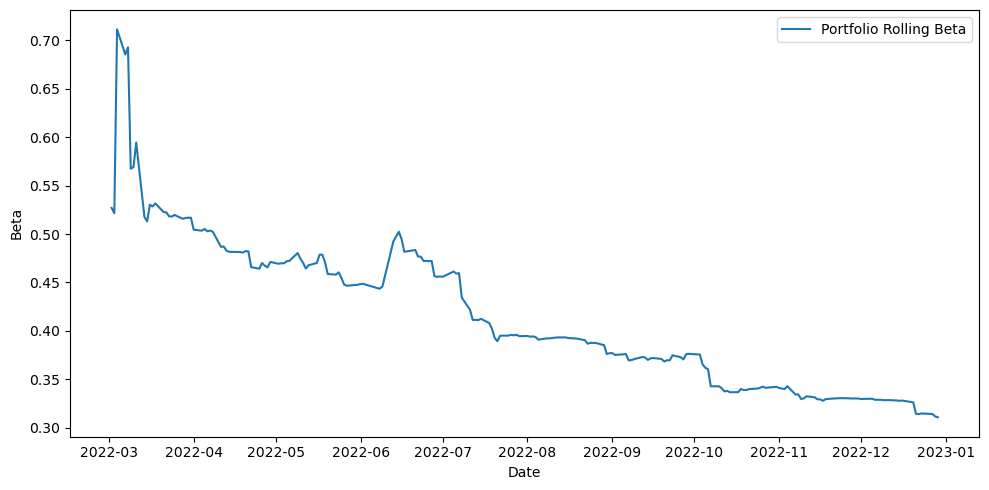

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(beta_df.index, beta_df["Portfolio"], label="Portfolio Rolling Beta")

plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.tight_layout()
plt.show()